# What are graph convolutions?

Most of the neural net graph algorithms are based on the idea of `graph convolutions`. As we will see graph convolutions are a generic form of the regular convolutions we are used to in image recognition and showed in some of the __series__ examples.

There are many types and form of graph convolutions, but most variation follow a structure, like described below.

Graphs are often formally described as $ G=(V,E) $. I.e. a graph is a set of nodes (V) and edges (E). And an edge connects a specific nodes n and u in of that graph. $e=(u, v)$.

Take below graph with 4 nodes, 4 edges and where each node has a set of 3 attributes denoted by the vector $x_{i}$

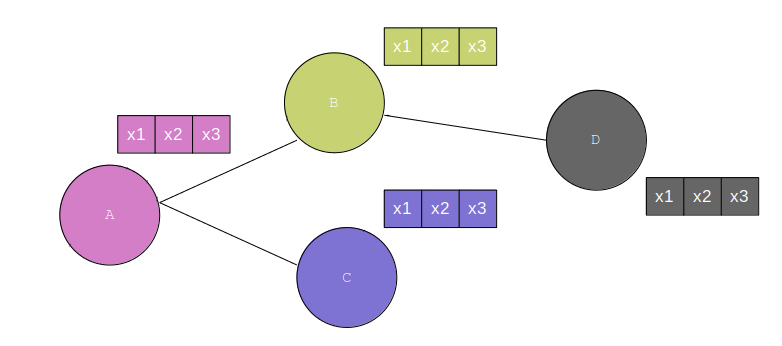

A graph convolution is defined as an operation that iteratively updates the hidden state $h$ of the a node by aggregating the previous hidden states of the nodes connected to that node.  

$h_{u}^{(k+1)} = UPDATE^{(k)}(h_{u}^{k}, AGGREGATE^{(k)}(h_{v}, \forall v \in N(u))) $. 

More formally; the hidden state $h$ of node $_u$ at iteration $^{(k+1)}$ is a function of the hidden state of node u at iteration k; $h_{u}^k$ and an aggregattion of all nodes $v$ in the neighborhood of u ($N(u)$).


That looks fairly daunting, but is suprisingly easly to understand once visualised

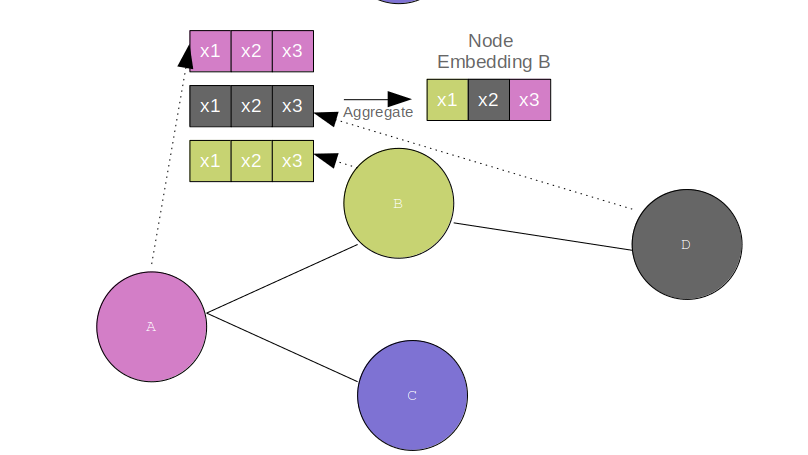

What above formula really says is that for instance for node B, the next hidden state will be a function of the current hidden state of node B and the hidden states of A and D (as they are connected to B). It is as if all the node attributes (or hidden states) are sent across the edges to the neighbors and re-combinded. 

Most Convolutional Graph algorightms apply learnable weights during the upgate and aggregation processes, so the neural net can 'learn' how to re-combine the neighborhood. Obviously the algorithm does not only do this for node B, but it applies a similar logic to all nodes. 

We can see that the new hidden state of node B contains information for the various neighbors it has after one hop. These hidden states are what is consequently used to perform all sorts of classification and prediction tasks. Typically a Graph Neural Net will not just run one, but multiple convolutions. Each convolution will push the information one hop further in the network. We have to be carefull however not to run too many convolutions in small networks, as this will lead to over-smoothing, it will make all node look alike.


An otherway to look at this is to represent this as a sort of computational graph that unrolls the network.

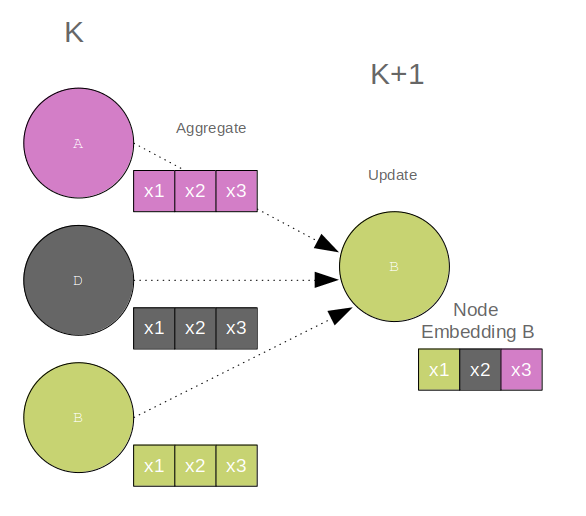

There is a bit more going on under the hood, some algos use attention. The embeddings tend to be normalized according to the degree, yet other algos don't just use node embeddings, but also edge weights or embeddings etc... But we hope above gives reader an intuition of what is going on under the hood. We're basically reconstructing the graph by iteratively sending information about the neightbours to the nodes. The network will learn how to combine that information so it forms usefull embedding that can be used to perform a specific task.

As mentioned in the beginning; a regular convolution, like the ones we saw in some of the `series` notebooks are a specific case of these more general graph convolutions. In those examples we showed how a convolutional filter slides over patches of the image, for each patch outputting a new new that contains information about all the pixels in the patch.

A regular 3x3 regular convolution can be seen as a graph convolution in a euclidian space. Each node is a pixel (for black and white images it has one node attribute) and has exactly 9 neighbour pixels. The edges are the exact same, they don't have weights or properties. It's not exactly the same, but people that have an intuition about what the convolution achieve in image processing will more likely also understand what they achieve in the more generic graph domain.

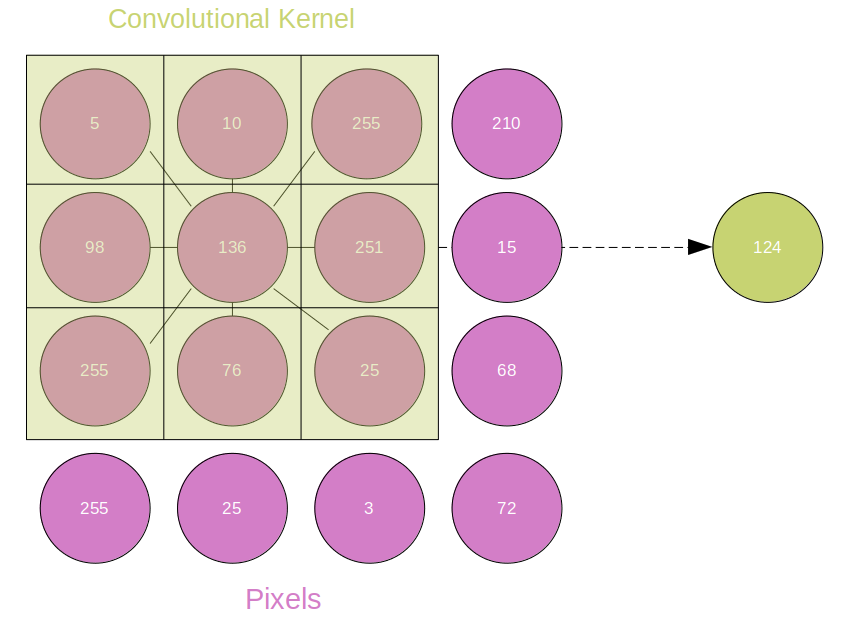

This is more specific than our graph examples because there's always the same layout of the network. In a more general network, as we are creating node-embedding, each node can have a different number of neighbours.